In [ ]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer #this is used in lemmatization
nltk.download('wordnet') # this is required for lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#UNZIP files (news summary)

In [ ]:
!unzip -u "/content/drive/MyDrive/ENFUSE/Dataset/articles1.csv.zip" -d "/content/drive/MyDrive/ENFUSE/Dataset/"
!unzip -u "/content/drive/MyDrive/ENFUSE/Dataset/articles2.csv.zip" -d "/content/drive/MyDrive/ENFUSE/Dataset/"
!unzip -u "/content/drive/MyDrive/ENFUSE/Dataset/articles3.csv.zip" -d "/content/drive/MyDrive/ENFUSE/Dataset/"


Archive:  /content/drive/MyDrive/ENFUSE/Dataset/articles1.csv.zip
Archive:  /content/drive/MyDrive/ENFUSE/Dataset/articles2.csv.zip
Archive:  /content/drive/MyDrive/ENFUSE/Dataset/articles3.csv.zip


In [ ]:
import pandas as pd

news1= pd.read_csv("/content/drive/MyDrive/ENFUSE/Dataset/articles1.csv")
news2= pd.read_csv("/content/drive/MyDrive/ENFUSE/Dataset/articles1.csv")
news3= pd.read_csv("/content/drive/MyDrive/ENFUSE/Dataset/articles1.csv")


In [ ]:
df[:10]

In [ ]:
news = pd.concat((news1, news2, news3))


In [ ]:
news.head()
news = news[:10]

In [ ]:
#Funtion to remove publication names from title ends


In [ ]:
def remove_publication(df, columns):
  
  publication_ny = "The New York Times"
  publication_br = "Breitbart"
  rem_pub = []
  for i in df[columns]:
    if publication_ny in i:
      k = ''.join(i.split('-')[:-1])
    elif publication_br in i:
      k = ''.join(i.split('-')[:-1])
    else:
      k=1
    rem_pub.append(k)

  return rem_pub

In [ ]:
#remove_publication(news, news[])
news['title'] = news['title'].astype(str)
news['content'] = news['content'].astype(str)

In [ ]:
news['title'] = remove_publication(news, columns='title')

In [ ]:
#Cleaning Data
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

def text_process(df,columns):
  lamm = WordNetLemmatizer()
  tokenizer = RegexpTokenizer(r'\w+')
  corpus = []
  length = []

  for i in df[columns]:
    #remove urls
    sentence = re.sub(r"http\S+"," ", i).lower()
    
    #remove characters other than alphabets
    sentence = re.sub('[^a-zA-Z]',' ',sentence)
    
    #remove spaces
    cleaned_sentence = re.sub(r'\s+',' ', sentence)

    #remove stopwords and lammetization
    cleaned_sentence = [lamm.lemmatize(word) for word in cleaned_sentence if word.lower() not in stopwords.words('english')]

    cleaned_sentence = ' '. join(cleaned_sentence)
    corpus.append(cleaned_sentence)

  return corpus


# Takes a lot of time

In [ ]:
news['content'] = text_process(news, columns='content')

In [ ]:
cleaned = news [['content','title']]

###Uploading cleaned data (since it takes 16 hours to clean the data)

In [ ]:
# Reading the cleaned file
data = pd.read_csv("/content/drive/MyDrive/ENFUSE/Dataset/news_final_cleaned.csv", encoding='utf-8')

In [ ]:
data.info

<bound method DataFrame.info of                publication  ...                                   Clean_Text_title
0                 Atlantic  ...           obama reaching adversary alienating ally
1                 Atlantic  ...  george michael carrie fisher week pop culture ...
2                 Atlantic  ...                                     new reality tv
3                 Atlantic  ...                           number explain education
4                 Atlantic  ...      atlantic politics policy daily happy gru year
...                    ...  ...                                                ...
99095  Talking Points Memo  ...  trump breaking mcconnell congenial republican ...
99096  Talking Points Memo  ...  woody allen open cannes son resurrects sex abu...
99097  Talking Points Memo  ...  nc school district allow pepper spray citing b...
99098  Talking Points Memo  ...  sean hannity warns fox news host mic hot air s...
99099  Talking Points Memo  ...       donald trump say 

In [ ]:
data.head()

,publication,Clean_Text,Clean_Text_title
0,Atlantic,presidential candidate barack obama promised e...,obama reaching adversary alienating ally
1,Atlantic,george michael mattered beyond musicwesley mor...,george michael carrie fisher week pop culture ...
2,Atlantic,reality seems tired seems derivative former ne...,new reality tv
3,Atlantic,writer generally favor word number sometimes g...,number explain education
4,Atlantic,article part feature also send via email polit...,atlantic politics policy daily happy gru year


In [ ]:
# Dropping duplicate values
data = data.drop_duplicates(subset=['Clean_Text', 'Clean_Text_title'], keep='first')

In [ ]:
#checking for null values
data.isnull().sum()

#dropping the null values
data.dropna(inplace=True)
data.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Checking again to see the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99052 entries, 0 to 99051
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   level_0           99052 non-null  int64 
 1   index             99052 non-null  int64 
 2   publication       99052 non-null  object
 3   Clean_Text        99052 non-null  object
 4   Clean_Text_title  99052 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [ ]:
# Assigning values based on lengths
title_length = data.apply(lambda row: len(row['Clean_Text_title'].split()), axis=1)
content_length = data.apply(lambda row: len(row['Clean_Text'].split()), axis=1)

In [ ]:
data.head()

,index,publication,Clean_Text,Clean_Text_title
0,0,Atlantic,presidential candidate barack obama promised e...,obama reaching adversary alienating ally
1,1,Atlantic,george michael mattered beyond musicwesley mor...,george michael carrie fisher week pop culture ...
2,2,Atlantic,reality seems tired seems derivative former ne...,new reality tv
3,3,Atlantic,writer generally favor word number sometimes g...,number explain education
4,4,Atlantic,article part feature also send via email polit...,atlantic politics policy daily happy gru year


In [ ]:
print(f'The median length of paragraphs are: {int(content_length.median())} words')
print(f'The median length of title are: {int(title_length.median())} words')


The median length of paragraphs are: 275 words
The median length of title are: 7 words


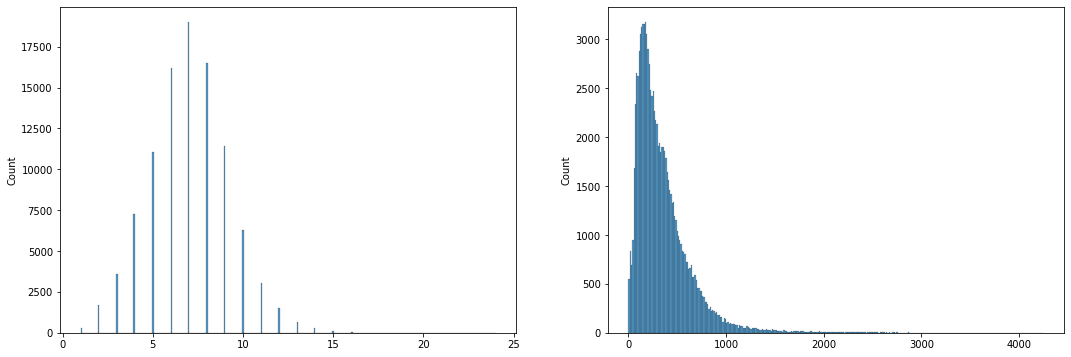

In [ ]:
# Identfying average lenght of title and content
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.histplot(title_length, ax=ax[0])
sns.histplot(content_length, ax=ax[1])
fig.show()

In [ ]:
# Checking the proportion of values under specific lenght
count_article = 0
count_headline = 0

for i in data['Clean_Text']:
    if(len(i.split()) <= 500):
        count_article += 1

for i in data['Clean_Text_title']:
    if(len(i.split()) <= 25):
        count_headline += 1

print(f'Proportion of Articles under 1000 words in length: {round(count_article / len(data), 2)}')
print(f'Proportion of Headline under 15 words in length: {round(count_headline / len(data), 2)}')

Proportion of Articles under 1000 words in length: 0.79
Proportion of Headline under 15 words in length: 1.0


In [ ]:
# Assigining Maxium values based on the assumption
#max_length_article = 1000
max_length_article = 200
max_length_headline = 25

In [ ]:
# Creating new columns
data['headline_length'] = data.apply(lambda row: len(row['Clean_Text'].split()), axis=1)
data['title_length'] = data.apply(lambda row: len(row['Clean_Text_title'].split()), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,level_0,index,publication,Clean_Text,Clean_Text_title,headline_length,title_length
0,0,0,Atlantic,presidential candidate barack obama promised e...,obama reaching adversary alienating ally,685,5
1,1,1,Atlantic,george michael mattered beyond musicwesley mor...,george michael carrie fisher week pop culture ...,420,8
2,2,2,Atlantic,reality seems tired seems derivative former ne...,new reality tv,664,3
3,3,3,Atlantic,writer generally favor word number sometimes g...,number explain education,323,3
4,4,4,Atlantic,article part feature also send via email polit...,atlantic politics policy daily happy gru year,474,7


In [ ]:
# Dropping the rows based on headline length
data = data.loc[data['headline_length'] <= max_length_article]

In [ ]:
# Dropping the rows based on title length
data = data.loc[data['title_length'] <= max_length_headline]

In [ ]:
# Checking the stats after dropping the rows
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35109 entries, 153 to 99051
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   level_0           35109 non-null  int64 
 1   index             35109 non-null  int64 
 2   publication       35109 non-null  object
 3   Clean_Text        35109 non-null  object
 4   Clean_Text_title  35109 non-null  object
 5   headline_length   35109 non-null  int64 
 6   title_length      35109 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [ ]:
# Checking head of data
data.head()

,level_0,index,publication,Clean_Text,Clean_Text_title,headline_length,title_length
153,153,153,Atlantic,one last public appearance u secretary state j...,problem john kerry making policy twitter,197,6
168,168,168,Atlantic,force gravity described using number metaphor ...,milky way stolen star,188,4
297,297,297,Atlantic,prick foreigner bleed ask watching president d...,failure moral imagination trump inaugural,134,5
344,344,344,Atlantic,significant order immediately withdrew u partn...,trump latest executive order,183,4
357,357,357,Atlantic,create user feedback survey,big question reader poll,4,4


###Model


In [ ]:
# Importing Libraries

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Attention, Embedding, Input, Bidirectional, LSTM, Concatenate, TimeDistributed, Dense, Add
from tensorflow.keras.initializers import Constant
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Applying End of String and Start of String because of the Encoder- Decoder strucutre we are going to use - Need to check this part once again
data['content'] = data['Clean_Text'].apply(lambda x : 'sos ' + x + ' eos')
data['Cleaned_Title'] = data ['Clean_Text_title'].apply(lambda x : 'sos ' + x + ' eos')

In [ ]:
# Checking the data head
data.head()

,level_0,index,publication,Clean_Text,Clean_Text_title,headline_length,title_length,content,Cleaned_Title
153,153,153,Atlantic,one last public appearance u secretary state j...,problem john kerry making policy twitter,197,6,sos one last public appearance u secretary sta...,sos problem john kerry making policy twitter eos
168,168,168,Atlantic,force gravity described using number metaphor ...,milky way stolen star,188,4,sos force gravity described using number metap...,sos milky way stolen star eos
297,297,297,Atlantic,prick foreigner bleed ask watching president d...,failure moral imagination trump inaugural,134,5,sos prick foreigner bleed ask watching preside...,sos failure moral imagination trump inaugural eos
344,344,344,Atlantic,significant order immediately withdrew u partn...,trump latest executive order,183,4,sos significant order immediately withdrew u p...,sos trump latest executive order eos
357,357,357,Atlantic,create user feedback survey,big question reader poll,4,4,sos create user feedback survey eos,sos big question reader poll eos


In [ ]:
# Tokenizing the content and spiltting the data into train, validation and test sets.

x = data['content']
y = data['Cleaned_Title']
x_tr, x_spare, y_tr, y_spare = train_test_split(data['content'], data['Cleaned_Title'], test_size=0.2, random_state=42, shuffle=False)

# Tokenise Content
max_len_text = 500 # Kept this as per our assumption and histogram.
max_len_summary = 15 # Kept this as per the histogram and assumption.

content_tokeniser = Tokenizer(filters='!"#$%&()*+-/:;<=>?@[\\]^_`{|}~\t\n', oov_token='unk')  # Check special characaters , !,:,;
content_tokeniser.fit_on_texts(list(x_tr + y_tr))
word_index = content_tokeniser.word_index
x_voc_size   =  len(content_tokeniser.word_index) + 1

In [ ]:
# Glove Embedding of 100 Dimensions

embeddings_index = {}
with open('/content/drive/MyDrive/ENFUSE/Dataset/Glove/glove.6B.100d.txt') as glove_in:
    for line in glove_in:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

In [ ]:
# Defining Hits and Miss. The aim is to save the hits that exists in the glove and not saving the miss unecessary zeros that will help in training.
EMBED_DIM = 100
hits=0 
miss=0
for word, i in word_index.items():
    if i >= x_voc_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        hits += 1
    else: miss+=1
print(hits, miss)

new_word_index = {}
new_reverse_word_index = {}

embedding_matrix = np.zeros((hits, EMBED_DIM))
hits = 0
for word, i in word_index.items():
    if i >= x_voc_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[hits] = embedding_vector
        new_word_index[word] = hits
        new_reverse_word_index[hits] = word
        hits += 1
print(hits)
print(len(new_word_index))  # Hits are 133906  whereas Miss are 100134 

58831 15119
58831
58831


In [ ]:
# Checking the indices and converting them into text to sequence

print(new_word_index['sos'])
print(new_reverse_word_index[27])
print(x_tr.size)
def texts_to_sequences(word_index, data, max_len):
    newdata = np.zeros((data.size, max_len), dtype=int)
    i = 0
    for line in data:
        temp = line.split(' ')
        if len(temp) >= max_len: temp = temp[0:max_len]
        j = 0
        for word in temp:
            if word in word_index:
                newdata[i][j] = word_index[word]
            else: newdata[i][j] = word_index['unk'] # If we don't have the word it would be unknown
            j+=1
        i+=1
    return newdata
x_tr = texts_to_sequences(new_word_index, x_tr, max_len_text)
x_val = texts_to_sequences(new_word_index, x_spare[0:-1000], max_len_text)
x_test = texts_to_sequences(new_word_index, x_spare[-1000:], max_len_text)

y_tr = texts_to_sequences(new_word_index, y_tr, max_len_summary)
y_val = texts_to_sequences(new_word_index, y_spare[0:-1000], max_len_summary)
y_test = texts_to_sequences(new_word_index, y_spare[-1000:], max_len_summary)


4
last
28087


###Model Architecture

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 500, 100)     5883100     input_6[0][0]                    
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 500, 512), ( 731136      embedding_2[0][0]                
____________________________________________________________________________________________

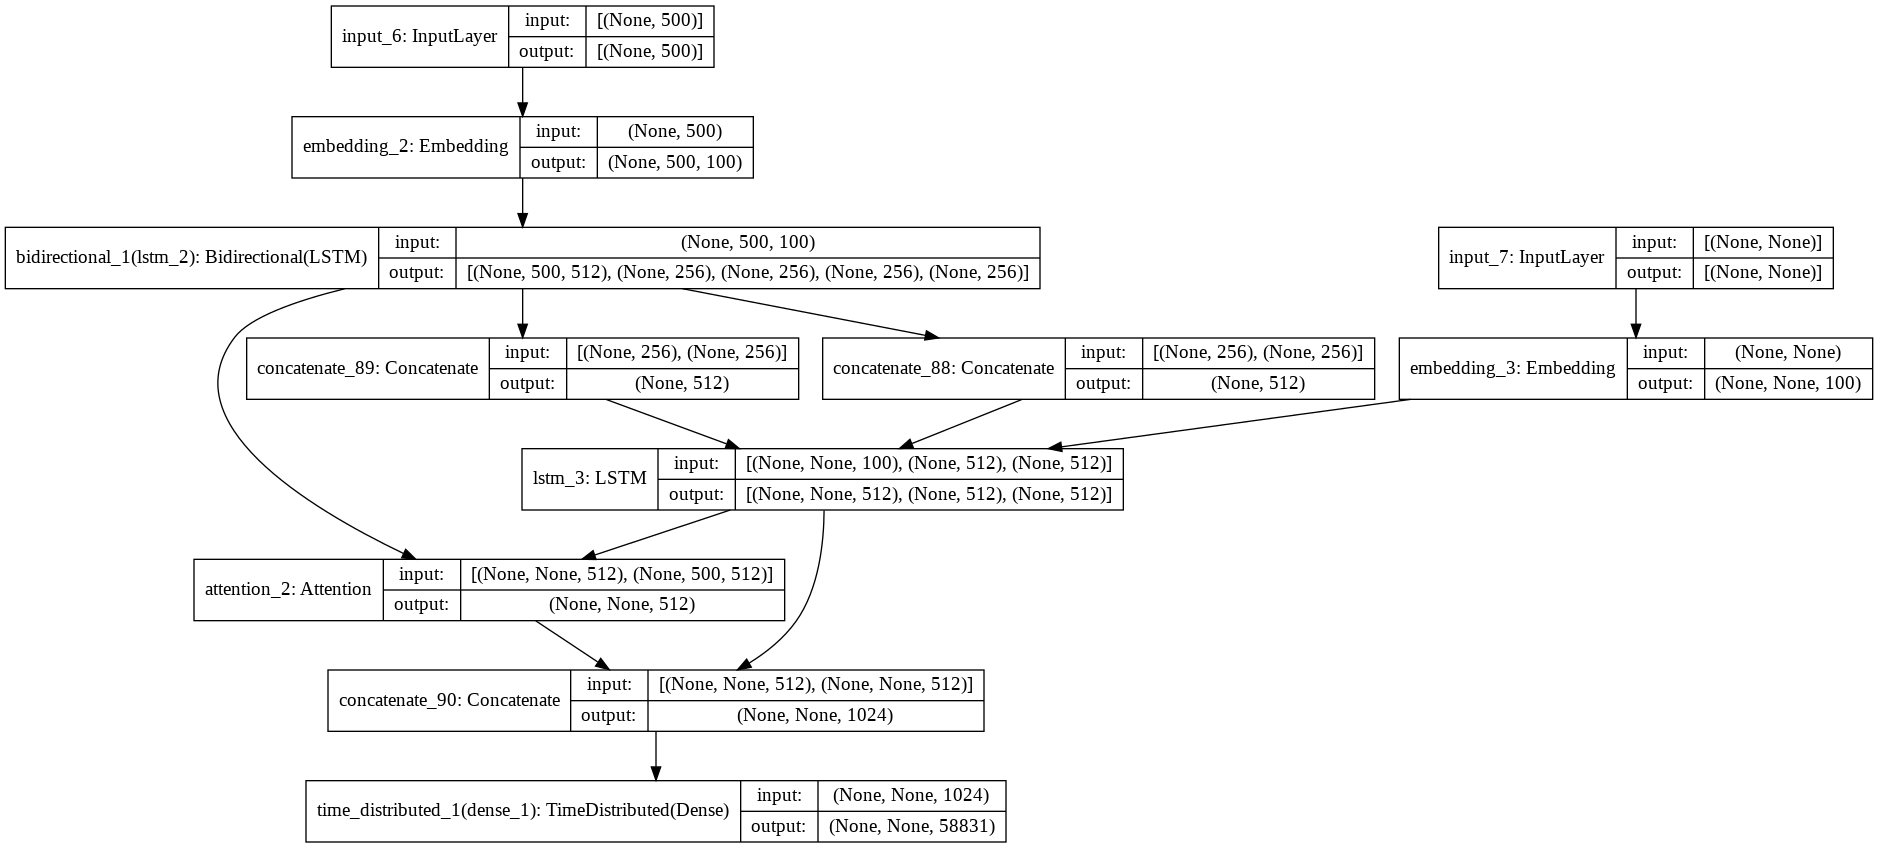

In [ ]:
# Encoder - Decoder, Bidirectional LSTM with Attention Layer

# Encoder
LATENT_DIM = 256
EMBED_DIM = 100
encoder_inputs = Input(shape=(max_len_text, ))
decoder_inputs = Input(shape=(None, ))
# encoder_inputs = enc_vectorize_layer(einputs)
enc_emb_layer = Embedding(hits, EMBED_DIM, embeddings_initializer=Constant(embedding_matrix), trainable=False)
enc_emb = enc_emb_layer(encoder_inputs)

#Bidirectional LSTM
encoder_lstm = Bidirectional(LSTM(LATENT_DIM, return_sequences=True, return_state=True)) 
encoder_outputs, fwd_h, fwd_c, bwd_h, bwd_c = encoder_lstm(enc_emb) 
encoder_state_h = Concatenate()([fwd_h, bwd_h])
encoder_state_c = Concatenate()([fwd_c, bwd_c])

# Decoder

#decoder_inputs = dec_vectorize_layer(dinputs)
dec_emb_layer = Embedding(hits, EMBED_DIM, embeddings_initializer=Constant(embedding_matrix), trainable=False)
dec_emb = dec_emb_layer(decoder_inputs) 

decoder_lstm = LSTM(LATENT_DIM*2, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_h, decoder_state_c = decoder_lstm(dec_emb,initial_state=[encoder_state_h, encoder_state_c]) 
decoder_state = Add()([decoder_state_h, decoder_state_c])

#Attention Layer
attn_layer = Attention()
attention_out = attn_layer([decoder_outputs, encoder_outputs]) #

# Concat attention input and decoder LSTM output
decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention_out])

# Dense Layer
decoder_dense = TimeDistributed(Dense(hits, activation='softmax')) # Replacing the X_vocab_size by hits, it would help in the quick training with those words that are part of Glove Embeddings
decoder_dense_output = decoder_dense(decoder_concat)

# Define the model 
opt = tf.keras.optimizers.RMSprop()
model = Model([encoder_inputs, decoder_inputs], decoder_dense_output)
model.compile(optimizer= opt, loss='sparse_categorical_crossentropy')


print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/encoder_decoder_summarisation1121f.h5')

In [ ]:
EPOCHS= 30
#os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')
es = EarlyStopping(monitor='loss', mode='min', verbose=1,patience=50)
#checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/encoder_decoder_0122_{epoch:02d}-{loss:.2f}.hdf5', monitor='loss', verbose=2, save_best_only=True, mode='min', save_freq='epoch')
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/encoder_decoder.hdf5', monitor='loss', verbose=2, save_best_only=True, mode='min', save_freq='epoch')
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=EPOCHS,batch_size=16, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),callbacks = [es, checkpoint])
#history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=EPOCHS,batch_size=16, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/30
1756/1756 [==============================] - 141s 78ms/step - loss: 4.7805 - val_loss: 3.9362

Epoch 00001: loss improved from inf to 4.50437, saving model to /content/drive/MyDrive/encoder_decoder.hdf5
Epoch 2/30
1756/1756 [==============================] - 137s 78ms/step - loss: 4.1800 - val_loss: 3.8315

Epoch 00002: loss improved from 4.50437 to 4.16816, saving model to /content/drive/MyDrive/encoder_decoder.hdf5
Epoch 3/30
1756/1756 [==============================] - 137s 78ms/step - loss: 3.9868 - val_loss: 3.7823

Epoch 00003: loss improved from 4.16816 to 4.00147, saving model to /content/drive/MyDrive/encoder_decoder.hdf5
Epoch 4/30
1756/1756 [==============================] - 137s 78ms/step - loss: 3.8412 - val_loss: 3.7577

Epoch 00004: loss improved from 4.00147 to 3.87010, saving model to /content/drive/MyDrive/encoder_decoder.hdf5
Epoch 5/30
1756/1756 [==============================] - 137s 78ms/step - loss: 3.7223 - val_loss: 3.7637

Epoch 00005: loss improved

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/encoder_decoder_summarisation1121f.h5')


In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/training_1',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/training_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/training_1/assets


In [ ]:
model.evaluate([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:])

2398/2398 [==============================] - 200s 83ms/step - loss: 1.2606


1.2605607509613037

In [ ]:
fine_tune_epochs = 4
total_epochs = EPOCHS + fine_tune_epochs
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=total_epochs,initial_epoch=history.epoch[-1],batch_size=16, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

IndexError: ignored

In [ ]:
# INFERENCE CODE
# model = tf.keras.models.load_model('/content/drive/MyDrive/encoder_decoder_0122_01-3.72.hdf5') #Give the name of the model checkpoint with path with lowest validation loss
# Encoder Inference Model
encoder_model_inference = Model(encoder_inputs, [encoder_outputs,fwd_h, fwd_c, bwd_h, bwd_c])

# Decoder Inference
# Below tensors will hold the states of the previous time step
decoder_state_h = Input(shape=(LATENT_DIM*2, ))
decoder_state_c = Input(shape=(LATENT_DIM*2, ))
decoder_intermittent_state_input = Input(shape=(max_len_text, LATENT_DIM*2))

# Get Embeddings of Decoder Sequence
decoder_embedding_inference = dec_emb_layer(decoder_inputs)

# Predict Next Word in Sequence, Set Initial State to State from Previous Time Step
decoder_output_inference, decoder_state_inference_h, decoder_state_inference_c = decoder_lstm(decoder_embedding_inference, initial_state=[decoder_state_h, decoder_state_c])

# Attention Inference
attention_layer = Attention()
attention_out_inference = attention_layer([decoder_output_inference, decoder_intermittent_state_input])
decoder_inference_concat = Concatenate(axis=-1)([decoder_output_inference, attention_out_inference])

# Dense Softmax Layer to Generate Prob. Dist. Over Target Vocabulary
decoder_output_inference = decoder_dense(decoder_inference_concat)

# Final Decoder Model
decoder_model_inference = Model([decoder_inputs, decoder_intermittent_state_input, decoder_state_h, decoder_state_c], [decoder_output_inference, decoder_state_inference_h, decoder_state_inference_c])

In [ ]:
# Function of the inference process

def decode_sequence(input_sequence):
  # Encode Input as State Vectors.
  encoder_output, fwd_h, fwd_c, bwd_h, bwd_c = encoder_model_inference.predict(input_sequence)
  encoder_state_h = Concatenate()([fwd_h, bwd_h])
  encoder_state_c = Concatenate()([fwd_c, bwd_c])
  # Generate Empty Target Sequence of Length 1.
  target_sequence = np.zeros((1, 1))

  # Choose 'start' as the first word of the target sequence
  target_sequence[0, 0] = new_word_index['sos']

  decoded_sentence = ''
  break_condition = False
  while not break_condition:
      token_output, decoder_state_h, decoder_state_c = decoder_model_inference.predict([target_sequence, encoder_output, encoder_state_h, encoder_state_c])
      # Sample Token
      sampled_token_index = np.argmax(token_output[0, -1, :])
      if not sampled_token_index == 0:
        sampled_token = new_reverse_word_index[sampled_token_index]

        if not sampled_token == 'eos':
            decoded_sentence += ' ' + sampled_token

        # Break Condition: Encounter Max Length / Find Stop Token.
        if sampled_token == 'eos' or len(decoded_sentence.split()) >= (max_len_summary - 1):
            break_condition = True

        # Update Target Sequence (length 1).
        target_sequence = np.zeros((1, 1))
        target_sequence[0, 0] = sampled_token_index

      #else:
        #print('BROKEN')
        #break_condition = True
      # Update internal states
      encoder_state_h = decoder_state_h
      encoder_state_c = decoder_state_c
  return decoded_sentence

## Function to convert an integer sequence to a word sequence
def sequence_to_headline(input_sequence):
  new_string = ''
  for item in input_sequence:
    if (not item == 0 and not item == new_word_index['sos']) and not item == new_word_index['eos']:
      new_string = new_string + new_reverse_word_index[item] + ' '
  return new_string

def sequence_to_article(input_sequence):
  new_string = ''
  for item in input_sequence:
    if not item == 0:
      new_string = new_string + new_reverse_word_index[item] + ' '
  return new_string

In [ ]:
# Predictions for 200 sentences
for i in range(len(x_val))[:20]:
  print('Article:', sequence_to_article(x_val[i]))
  #print('Original Headline:', sequence_to_headline(y_val[i]))
  print('Predicted Headline:', decode_sequence(x_val[i].reshape(1, max_len_text)))
  print('\n')

Article: sos nfl infamously botched ray rice investigation recently josh brown discipline league trying compensate directing energy domestic violence allegation levied ezekiel elliott cowboy star rookie running back embroiled controversy since accused july abusing ohio posting elliott incident later revealed accuser also alleged elliott florida training draft pushed wall february person elliott camp informed league running back public enemy nfl bent gathering fact avoid another public relation disaster nfl made baseline suspension domestic violence six game second offense resulting permanent banishment course ignored guideline year brown giant former kicker given suspension authority later revealed depth allegation brown brown nfl investigating brown released giant rice former raven running back handed suspension allegedly assaulting wife video became public rice decking team cut league suspended indefinitely team taken chance since elliott former ohio state star league leading rusher 

In [ ]:
# Test Set Predictions for 200 articles
for i in range(len(x_test))[:20]:
  print('Article:', sequence_to_article(x_test[i]))
  print('Original Headline:', sequence_to_headline(y_test[i]))
  print('Predicted Headline:', decode_sequence(x_test[i].reshape(1, max_len_text)))
  print('\n')

Article: sos story updated report republican frontrunner donald trump would score another super tuesday win endorsement florida gov rick scott spokesperson governor said scott endorsing trump hosted evening news conference club palm beach florida super tuesday result continued roll cbs major garrett fox news bret baier reported would involve endorsement scott spokesperson governor told associated press reporter endorsing scott press secretary told msnbc producer scott tallahassee press conference trump said know endorsement scott lot respect rick scott know endorsement friend mine lot respect trump scott said earlier tuesday sure would endorse anyone presidential race told tampa bay time made decision possible endorsement eos 
Original Headline: denies report florida gov rick scott endorsing donald trump 
Predicted Headline:  trump win first secretary state


Article: sos ted cruz projected win lone star state tuesday major upset could keep candidacy afloat undermine trump narrative un

###Diagnostics Model Test - Train

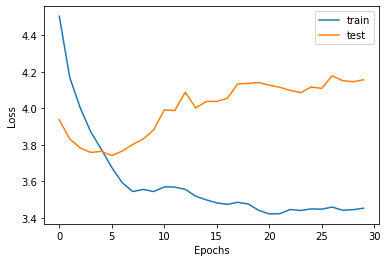

In [ ]:
# Loss Plot of Trainig Loss vs Valiadation loss 
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
pyplot.legend() 
pyplot.show()

###Evalutaion

In [ ]:
# Installing Sumeval package for evaluating using ROUGE score
!pip install sumeval

     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
  Created wheel for sumeval: filename=sumeval-0.2.2-cp37-none-any.whl size=54536 sha256=1076083c60e09d924e5539592eaf2d086d2ebd378e2a4650a06b32794d4841ac
  Stored in directory: /root/.cache/pip/wheels/7b/6f/57/19ceecab21445c88f3c565735fa1887b4cd18d340c972eb445
Successfully built sumeval


In [ ]:
corpus_size = 1000

In [ ]:
# Calculating Rouge Score using Sumeval library  https://github.com/chakki-works/sumeval
from sumeval.metrics.rouge import RougeCalculator
rouge = RougeCalculator()

rouge_1 = []
rouge_2 = []
rouge_l = []

for i in range(len(x_val))[:corpus_size]:

  rouge_1.append(rouge.rouge_n(
            summary= decode_sequence(x_test[i].reshape(1, max_len_text)) ,
            references= sequence_to_headline(y_test[i]) ,
            n=1))

  rouge_2.append(rouge.rouge_n(
            summary= decode_sequence(x_test[i].reshape(1, max_len_text)),
            references= sequence_to_headline(y_test[i]) ,
            n=2))

  rouge_l.append(rouge.rouge_l(
            summary= decode_sequence(x_test[i].reshape(1, max_len_text)),
            references= sequence_to_headline(y_test[i])))

In [ ]:
# Printing the combined count of all the three values

print("ROUGE Values: \n")

print("Rouge_1 value is {}".format(sum(rouge_1)/len(rouge_1)))
print("Rouge_2 value is {}".format(sum(rouge_2)/len(rouge_2)))
print("Rouge_l value is {}".format(sum(rouge_l)/len(rouge_l)))

ROUGE Values: 

Rouge_1 value is 0.1911673499673039
Rouge_2 value is 0.03215632227249874
Rouge_l value is 0.18026896636775921


In [ ]:
# BLEU Score - https://github.com/alvations/nltk/blob/develop/nltk/translate/bleu_score.py#L425

from nltk.translate.bleu_score import sentence_bleu
bleu = 0

for i in range(len(x_val))[:corpus_size]:
  candidate = decode_sequence(x_test[i].reshape(1, max_len_text))
  reference = sequence_to_headline(y_test[i])
  bleu += sentence_bleu(reference, candidate)

bleu = bleu/corpus_size

In [ ]:
print(bleu)

0.7578590067437533


In [ ]:
import pandas as pd


In [ ]:
search_result = pd.read_feather('/content/drive/MyDrive/ENFUSE/Dictionary/search_result1.feather')

In [ ]:
##news['content'] = text_process(news, columns='content1')

In [ ]:
search_result.head()

,search_string,content
0,irish,. politics learning the tricks of the imperi...
1,irish,politics learning the tricks of the imperial ...
2,irish,j. patel and the indian irish independence le...
3,ireland,patel and the indian irish independence leagu...
4,irish,the formation of this group was the brainchild...


In [ ]:
search_result['search_string'] = search_result['search_string'].apply(lambda x : 'sos ' + x + ' eos')

In [ ]:
search_result['content'] = search_result['content'].apply(lambda x : 'sos ' + x + ' eos')

In [ ]:
search_result.shape

(503, 2)

In [ ]:
x1 = search_result['content']
y1 = search_result['search_string']


In [ ]:
x1 = texts_to_sequences(new_word_index, x1, max_len_text)
y1 = texts_to_sequences(new_word_index, y1, max_len_text)

In [ ]:
predicted =[]
for i in range(len(x1)):
  a = decode_sequence(x1[i].reshape(1, max_len_text))
  predicted.append(a)

KeyboardInterrupt: ignored

In [ ]:
original_article = []
for i in range(len(x1)):
  b = sequence_to_article(x1[i])
  original_article.append(b)

In [ ]:
final_result = pd.DataFrame(list(zip(original_article, predicted)), columns =['Article', 'Summary'])
final_result.to_csv(r'/content/drive/MyDrive/ENFUSE/Dictionary/final_result.csv', index = False)

In [ ]:
for i in range(len(x_test))[:400]:
  print('Article:', sequence_to_article(x1[i]))
  print('Keyword:', sequence_to_headline(y1[i]))
  print('Predicted summary:', decode_sequence(x1[i].reshape(1, max_len_text)))
  print('\n')

Article: sos politics learning imperial secession trade irish indian nationalism in s s throughout first half twentieth century many household indian nationalist movement came keen developed variety irish indian embracing many leading political literary day eos 
Keyword: irish 
Predicted summary:  voight voight


Article: sos politics learning imperial secession trade irish indian nationalism in s s throughout first half twentieth century many household indian nationalist movement came keen developed variety irish indian embracing many leading political literary day as result influenced respective revolutionary eos 
Keyword: irish 
Predicted summary:  democrat


Article: sos patel indian irish independence an july there appeared an article announcing formation group calling indian irish independence league league would operate view work every possible secure complete independence india ireland achieve closest solidarity irish in common struggle british imperialism eos 
Keyword: irish 


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
bleu = 0

for i in range(len(search_result)):
  candidate = decode_sequence(x1[i].reshape(1, max_len_text))
  reference = sequence_to_headline(x1[i])
  bleu += sentence_bleu(reference, candidate)

bleu = bleu/len(search_result)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



In [ ]:
bleu

In [ ]:
!pip install sumeval

In [ ]:
# Calculating Rouge Score using Sumeval library  https://github.com/chakki-works/sumeval
from sumeval.metrics.rouge import RougeCalculator
rouge = RougeCalculator()

rouge_1 = []
rouge_2 = []
rouge_l = []

for i in range(len(search_result)):

  rouge_1.append(rouge.rouge_n(
            summary= decode_sequence(x1[i].reshape(1, max_len_text)) ,
            references= sequence_to_headline(x1[i]) ,
            n=1))

  rouge_2.append(rouge.rouge_n(
            summary= decode_sequence(x1[i].reshape(1, max_len_text)),
            references= sequence_to_headline(x1[i]) ,
            n=2))

  rouge_l.append(rouge.rouge_l(
            summary= decode_sequence(x1[i].reshape(1, max_len_text)),
            references= sequence_to_headline(x1[i])))

In [ ]:
# Printing the combined count of all the three values

print("ROUGE Values: \n")

print("Rouge_1 value is {}".format(sum(rouge_1)/len(rouge_1)))
print("Rouge_2 value is {}".format(sum(rouge_2)/len(rouge_2)))
print("Rouge_l value is {}".format(sum(rouge_l)/len(rouge_l)))

ROUGE Values: 

Rouge_1 value is 0.028763096840504727
Rouge_2 value is 0.0009657498363411552
Rouge_l value is 0.027776730717360632
